## Importing useful packages

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from keras.losses import CategoricalCrossentropy
from keras.metrics import CategoricalAccuracy
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report, balanced_accuracy_score # Various classification metrics we may find useful
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
import seaborn as sns; sns.set()  # for plot styling
from google.colab import files
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score # required for evaluating classification models
from sklearn.preprocessing import StandardScaler # We will be using the inbuilt preprocessing functions sklearn provides
from sklearn.model_selection import train_test_split # A library that can automatically perform data splitting for us
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, LabelEncoder, OneHotEncoder
from tensorflow.keras.activations import sigmoid, linear, relu, softmax
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy  # We will be using TFs MSE loss function for regression and BinaryCross Entropy for classification.
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import BinaryAccuracy, Accuracy
from tensorflow.keras.callbacks import EarlyStopping

# Data Exploration

## Data Loading and Manipulation

In [64]:
# Reading the data
uploaded = files.upload()
data = pd.read_csv("COMP1801_Coursework_Dataset.csv")
df = pd.DataFrame(data)
df.head()

Saving COMP1801_Coursework_Dataset.csv to COMP1801_Coursework_Dataset (1).csv


,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,HeatTreatTime,Nickel%,Iron%,Cobalt%,Chromium%,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,1469.17,Nozzle,equiGrain,13,3.84,6.47,46.87,65.73,16.52,16.82,0.93,10,0,0,Bottom,Die
1,1793.64,Block,singleGrain,19,2.62,3.48,44.70,54.22,35.38,6.14,4.26,19,0,0,Bottom,Investment
2,700.60,Blade,equiGrain,28,0.76,1.34,9.54,51.83,35.95,8.81,3.41,35,3,0,Bottom,Investment
3,1082.10,Nozzle,colGrain,9,2.01,2.19,20.29,57.03,23.33,16.86,2.78,0,1,0,Top,Continuous
4,1838.83,Blade,colGrain,16,4.13,3.87,16.13,59.62,27.37,11.45,1.56,10,0,0,Top,Die


## Data Preprocessing and EDA

In [65]:
# finding various attributes of the dataset
print('Shape of the data (rows and columns):')
print(df.shape)
print()
print('List of the column names:')
print(df.columns)
print()
print('The data type of all the columns (all just floats here):')
print(df.dtypes)

Shape of the data (rows and columns):
(1000, 16)

List of the column names:
Index(['Lifespan', 'partType', 'microstructure', 'coolingRate', 'quenchTime',
       'forgeTime', 'HeatTreatTime', 'Nickel%', 'Iron%', 'Cobalt%',
       'Chromium%', 'smallDefects', 'largeDefects', 'sliverDefects',
       'seedLocation', 'castType'],
      dtype='object')

The data type of all the columns (all just floats here):
Lifespan          float64
partType           object
microstructure     object
coolingRate         int64
quenchTime        float64
forgeTime         float64
HeatTreatTime     float64
Nickel%           float64
Iron%             float64
Cobalt%           float64
Chromium%         float64
smallDefects        int64
largeDefects        int64
sliverDefects       int64
seedLocation       object
castType           object
dtype: object


In [66]:
# Making list of numerical and categorical features
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns
num_without_target = numeric_cols.drop('Lifespan')
target = ['Lifespan']
all_features = df.columns

In [67]:
print(numeric_cols)
print(categorical_cols)
print(num_without_target)
print(all_features)
print(target)

Index(['Lifespan', 'coolingRate', 'quenchTime', 'forgeTime', 'HeatTreatTime',
       'Nickel%', 'Iron%', 'Cobalt%', 'Chromium%', 'smallDefects',
       'largeDefects', 'sliverDefects'],
      dtype='object')
Index(['partType', 'microstructure', 'seedLocation', 'castType'], dtype='object')
Index(['coolingRate', 'quenchTime', 'forgeTime', 'HeatTreatTime', 'Nickel%',
       'Iron%', 'Cobalt%', 'Chromium%', 'smallDefects', 'largeDefects',
       'sliverDefects'],
      dtype='object')
Index(['Lifespan', 'partType', 'microstructure', 'coolingRate', 'quenchTime',
       'forgeTime', 'HeatTreatTime', 'Nickel%', 'Iron%', 'Cobalt%',
       'Chromium%', 'smallDefects', 'largeDefects', 'sliverDefects',
       'seedLocation', 'castType'],
      dtype='object')
['Lifespan']


In [68]:
df.describe()

,Lifespan,coolingRate,quenchTime,forgeTime,HeatTreatTime,Nickel%,Iron%,Cobalt%,Chromium%,smallDefects,largeDefects,sliverDefects
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1298.556320,17.639000,2.764230,5.464600,30.194510,60.243080,24.553580,12.434690,2.768650,17.311000,0.550000,0.292000
std,340.071434,7.491783,1.316979,2.604513,16.889415,5.790475,7.371737,4.333197,1.326496,12.268365,1.163982,1.199239
min,417.990000,5.000000,0.500000,1.030000,1.030000,50.020000,6.660000,5.020000,0.510000,0.000000,0.000000,0.000000
25%,1047.257500,11.000000,1.640000,3.170000,16.185000,55.287500,19.387500,8.597500,1.590000,7.000000,0.000000,0.000000
50%,1266.040000,18.000000,2.755000,5.475000,29.365000,60.615000,24.690000,12.585000,2.865000,18.000000,0.000000,0.000000
75%,1563.050000,24.000000,3.970000,7.740000,44.955000,65.220000,29.882500,16.080000,3.922500,26.000000,0.000000,0.000000
max,2134.530000,30.000000,4.990000,10.000000,59.910000,69.950000,43.650000,19.990000,4.990000,61.000000,4.000000,8.000000


In [69]:
# Checking the null valuses
print(df.isnull().sum())

Lifespan          0
partType          0
microstructure    0
coolingRate       0
quenchTime        0
forgeTime         0
HeatTreatTime     0
Nickel%           0
Iron%             0
Cobalt%           0
Chromium%         0
smallDefects      0
largeDefects      0
sliverDefects     0
seedLocation      0
castType          0
dtype: int64


#### Creating scatter plots using the Lifespan feature alongside all numerical features individually

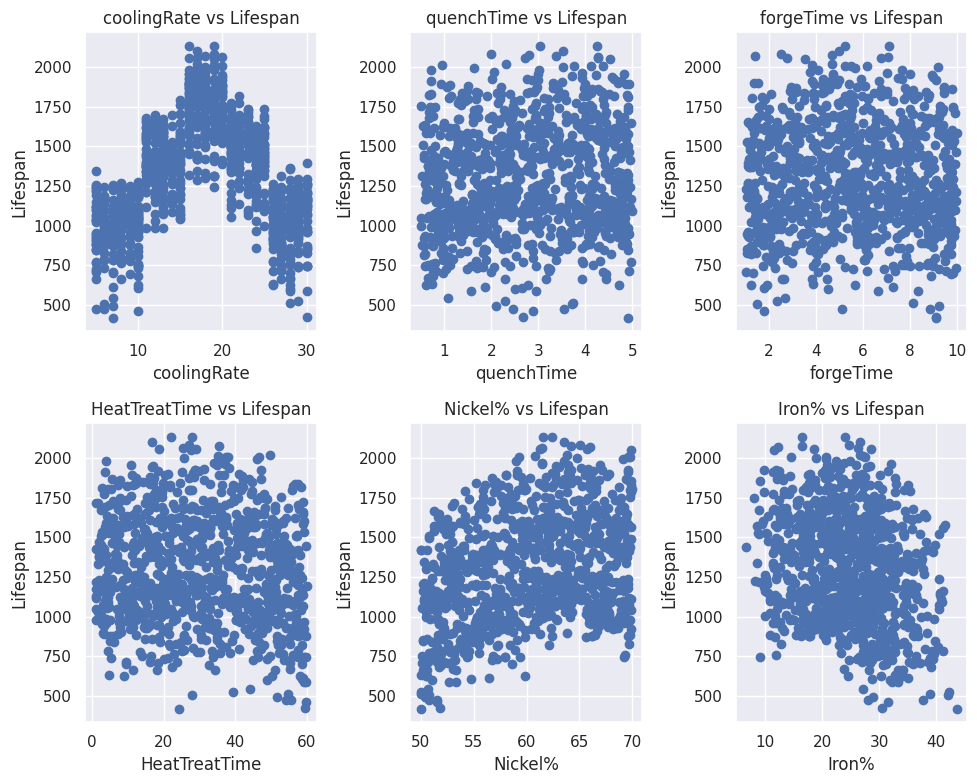

In [70]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the features and create scatter plots
for idx, feature in enumerate(num_without_target[:6]):
    if idx < len(axes):  # Ensure we don't exceed the number of subplots
        axes[idx].scatter(df[feature], df['Lifespan'])
        axes[idx].set_title(f'{feature} vs Lifespan')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Lifespan')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

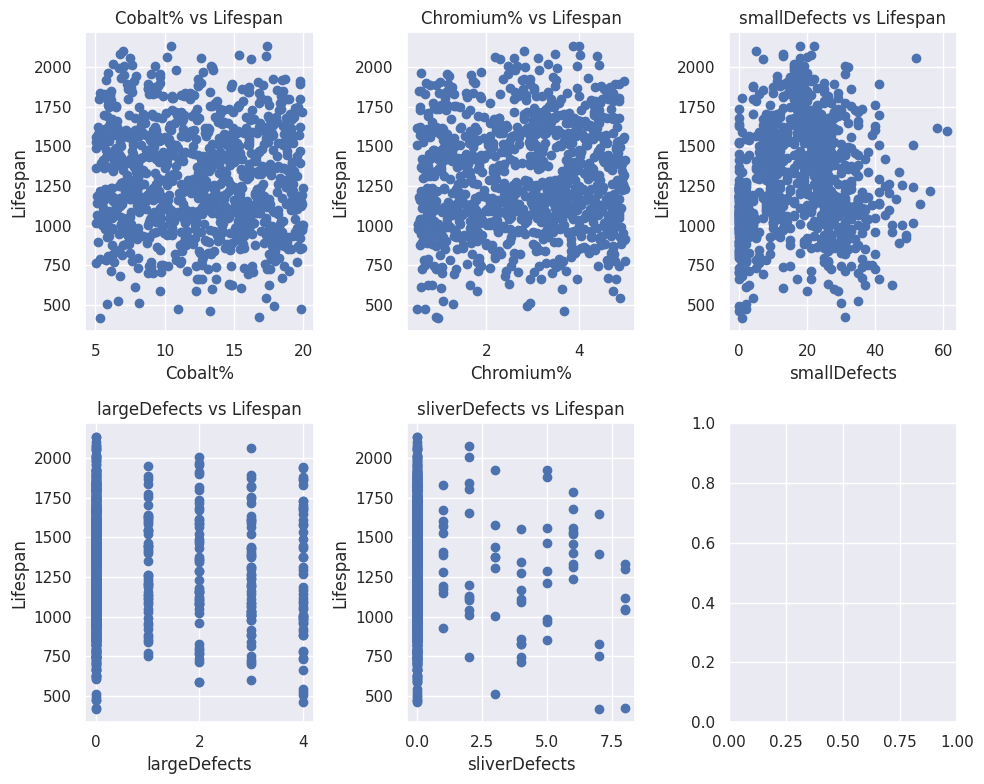

In [71]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the features and create scatter plots
for idx, feature in enumerate(num_without_target[6:]):
    if idx < len(axes):  # Ensure we don't exceed the number of subplots
        axes[idx].scatter(df[feature], df['Lifespan'])
        axes[idx].set_title(f'{feature} vs Lifespan')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Lifespan')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#### Creating box plot using the Lifespan feature alongside all categorical features

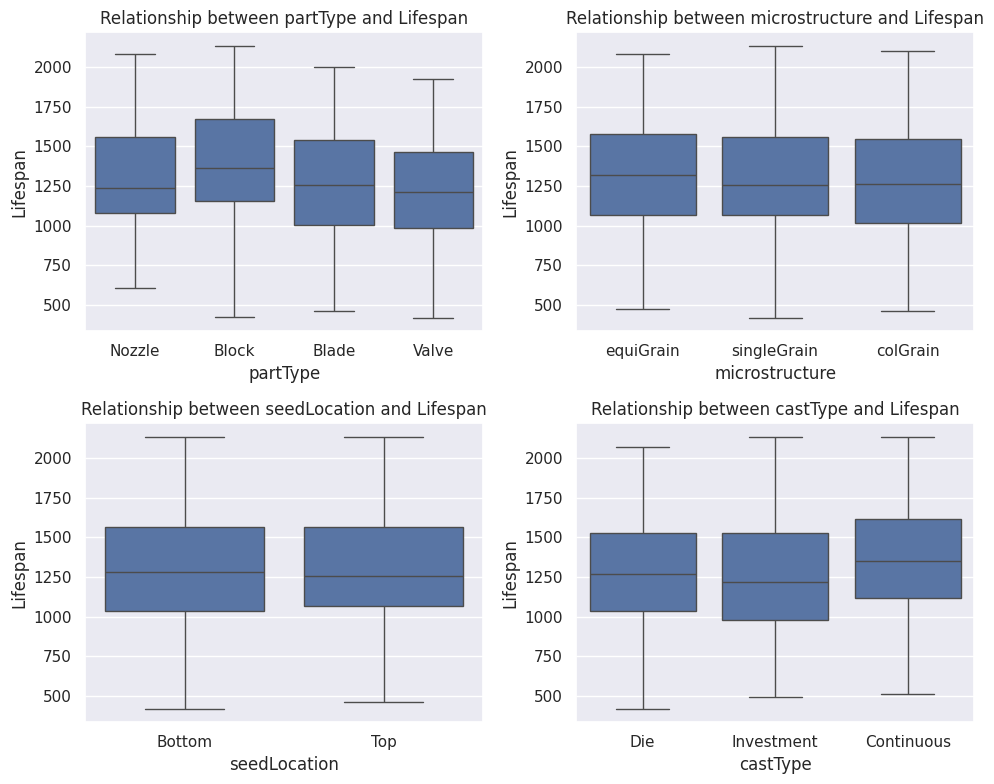

In [72]:
categorical_features = ['partType', 'microstructure', 'seedLocation', 'castType']
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the features and create box plots using Seaborn
for idx, feature in enumerate(categorical_features):
    if idx < len(axes):  # Ensure we don't exceed the number of subplots
        sns.boxplot(x=feature, y='Lifespan', data=df, ax=axes[idx])
        axes[idx].set_title(f'Relationship between {feature} and Lifespan')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Lifespan')


plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#### Checking the Correlation among numerical features by Heatmap

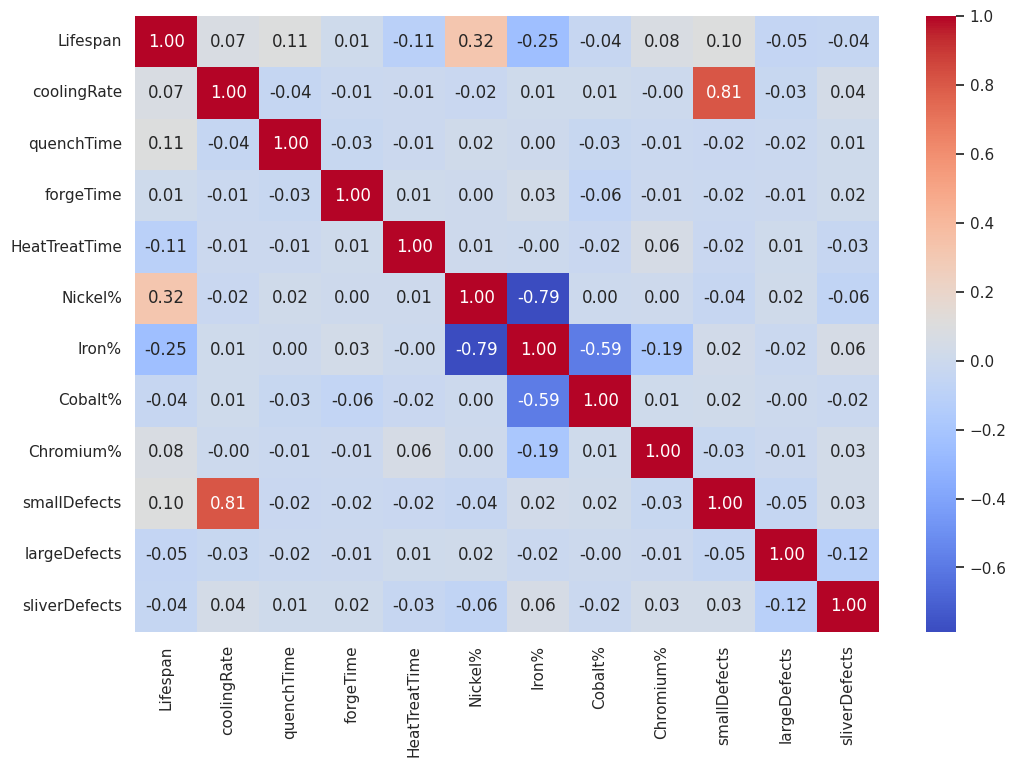

In [73]:
correlation_matrix = df[numeric_cols].corr()

# Figure size
plt.figure(figsize=(12,8))

# Creating heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
#

# Show the plot
plt.show()

According to the heatmap it is clear that there have two strong linear relationship. Small_defects and colling_rate has a positive relation where nickel% and Iron% has negative relation.

In [74]:
# Categorical features will be apply in model
categorical_final = ['partType', 'castType']

# Regression Implementation

### Data Preprocessing

####  Split data in Train, Valid and Test set

In [75]:
X = df.drop(columns=['Lifespan','microstructure', 'seedLocation'])
y = df['Lifespan']

In [76]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.10, shuffle=True, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.11, shuffle=True, random_state=0)

#### Standardizing the numerical data  and  encoding the categorical data by OneHotEncoder

In [77]:
scaler = StandardScaler()
onehot = OneHotEncoder(handle_unknown='ignore')

#Apply encoder and sclaing on data
numerical_transformer = Pipeline(steps=[
    ('scale', scaler)
])

categorical_transformer = Pipeline(steps=[
    ('categorical', onehot)
])

preprocessor =ColumnTransformer(transformers=[
    ('num', numerical_transformer, num_without_target),
    ('cat', categorical_transformer, categorical_final)
])

scal_encod_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor)
])

In [78]:
X_train=scal_encod_pipeline.fit_transform(X_train)
X_valid=scal_encod_pipeline.fit_transform(X_valid)
X_test=scal_encod_pipeline.fit_transform(X_test)

In [79]:
print('The shape of `X_train`:', X_train.shape)
print('The shape of `X_valid`:', X_valid.shape)
print('The shape of `X_test`:', X_test.shape)

The shape of `X_train`: (801, 18)
The shape of `X_valid`: (99, 18)
The shape of `X_test`: (100, 18)


## Linear Regression Model

In [80]:
################
# Training Data
################
obj = sklearn.linear_model.LinearRegression()
obj.fit(X_train, y_train)

y_pred_train = obj.predict(X_train)
MSE_train = sklearn.metrics.mean_squared_error(y_train, y_pred_train)
R2_train = sklearn.metrics.r2_score(y_train, y_pred_train)

#The mean squared error loss
print('Mean squared loss of train:', MSE_train)
#The R2 score of train
print('R2 score of train:',R2_train)

################
# Validation Data
################
obj = sklearn.linear_model.LinearRegression()
obj.fit(X_valid, y_valid)

y_pred_valid = obj.predict(X_valid)
MSE_valid = sklearn.metrics.mean_squared_error(y_valid, y_pred_valid)
R2_valid = sklearn.metrics.r2_score(y_valid, y_pred_valid)

#The mean squared error loss
print('Mean squared loss of valid:', MSE_valid)
#The R2 score of train
print('R2 score of valid:',R2_valid)

Mean squared loss of train: 94597.44565717851
R2 score of train: 0.19719424263991925
Mean squared loss of valid: 70682.45020606062
R2 score of valid: 0.13041507145979225


The linear model indicates a slight linear relationship between target features and other variables. It may be more effective to explore polynomial regression, as there could be a non-linear relationship.

## Polynomial

Degree: 1
Training Set MSE: 95517.6509715909
Training Set R2 Score: 0.18954512217146668
Validation Set MSE: 80596.85759074076
Validation Set R2 Score: 0.04723195212835951
Degree: 2
Training Set MSE: 18564.303374463223
Training Set R2 Score: 0.8424842940516062
Validation Set MSE: 22532.5871165378
Validation Set R2 Score: 0.7336331752593324
Degree: 3
Training Set MSE: 14851.345038215406
Training Set R2 Score: 0.8739882638852149
Validation Set MSE: 52630.29970524721
Validation Set R2 Score: 0.37783594288881406
Degree: 4
Training Set MSE: 854.7741763157104
Training Set R2 Score: 0.992747351996303
Validation Set MSE: 1.3951256112950386e+16
Validation Set R2 Score: -164923440557.8053


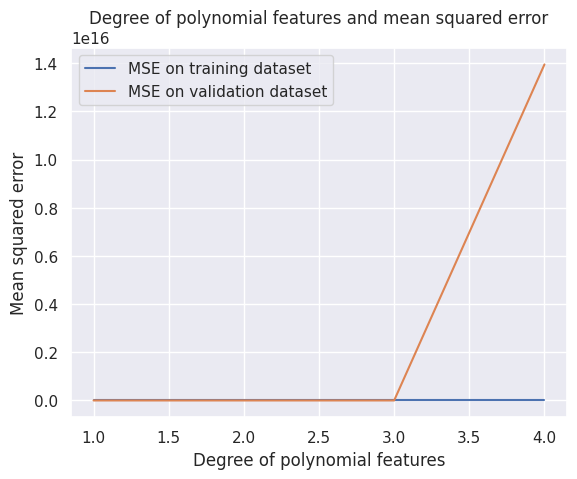

The best degree of polynomials: 2
Test Set MSE: 23644.73630466849
Test Set R2 Score: 0.8176930119363998


In [81]:
# Separate features and target variable
X = df.drop(columns=['Lifespan','microstructure', 'seedLocation'])
y = df['Lifespan']

# Split the data into training, validation, and test sets
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.10, shuffle=True, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.12, shuffle=True, random_state=0)

# Initialize lists to store MSE and R² values for each degree
mse_train_list = []
mse_valid_list = []
R2_train_list = []
R2_valid_list = []

# Define numerical and categorical feature columns (specify these lists)
num_without_target = X.select_dtypes(include=['float64', 'int64']).columns.tolist()  # List of numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()  # List of categorical columns

# Loop through polynomial degrees from 1 to 4
for degree in range(1, 5):
    print(f"Degree: {degree}")

    # Define the transformers
    poly = PolynomialFeatures(degree=degree)
    scaler = StandardScaler()
    onehot = OneHotEncoder(handle_unknown='ignore')

    # Apply PolynomialFeatures and Scaling only to numerical features
    numerical_transformer = Pipeline(steps=[
        ('poly', poly),
        ('scale', scaler)
    ])

    # Apply OneHotEncoder to categorical features
    categorical_transformer = Pipeline(steps=[
        ('onehot', onehot)
    ])

    # Combine numerical and categorical transformations using ColumnTransformer
    preprocessor = ColumnTransformer(transformers=[
        ('num', numerical_transformer, num_without_target),  # Apply poly and scale to numerical
        ('cat', categorical_transformer, categorical_cols)  # One-hot encode categorical features
    ])

    # Create a pipeline that applies preprocessing and then the model
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())  # Linear regression model
    ])

    # Fit the model on the training set
    model_pipeline.fit(X_train, y_train)

    # Make predictions and evaluate on training and validation sets
    y_pred_train = model_pipeline.predict(X_train)
    y_pred_valid = model_pipeline.predict(X_valid)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_valid = mean_squared_error(y_valid, y_pred_valid)
    R2_train = r2_score(y_train, y_pred_train)
    R2_valid = r2_score(y_valid, y_pred_valid)

    mse_train_list.append(mse_train)
    mse_valid_list.append(mse_valid)
    R2_train_list.append(R2_train)
    R2_valid_list.append(R2_valid)

    # Print the results
    print("Training Set MSE:", mse_train)
    print("Training Set R2 Score:", R2_train)
    print("Validation Set MSE:", mse_valid)
    print("Validation Set R2 Score:", R2_valid)

# Plot MSE values for training and validation sets
degrees = [1, 2, 3, 4]
plt.plot(degrees, mse_train_list, label='MSE on training dataset')
plt.plot(degrees, mse_valid_list, label='MSE on validation dataset')

# Labels and title for the plot
plt.xlabel('Degree of polynomial features')
plt.ylabel('Mean squared error')
plt.title('Degree of polynomial features and mean squared error')

# Add legend to the plot
plt.legend()

# Show the plot
plt.show()

# Find the best degree based on validation MSE
best_degree = np.nanargmin(mse_valid_list) + 1  # +1 since degrees are 1-indexed
print('The best degree of polynomials:', best_degree)

# Final evaluation on the test set with the best degree
# Re-run the pipeline with the best degree on the full training set
best_poly = PolynomialFeatures(degree=best_degree)
numerical_transformer = Pipeline(steps=[
    ('poly', best_poly),
    ('scale', scaler)
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, num_without_target),
    ('cat', categorical_transformer, categorical_final)
])

# Final model pipeline
final_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge())
])

# Fit on entire training/validation data
final_model_pipeline.fit(X_train_valid, y_train_valid)

# Test set predictions and evaluation
y_pred_test = final_model_pipeline.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
R2_test = r2_score(y_test, y_pred_test)

print("Test Set MSE:", mse_test)
print("Test Set R2 Score:", R2_test)


In [82]:
# Define the transformers
degree = 2
poly = PolynomialFeatures(degree=degree)
scaler = StandardScaler()
onehot = OneHotEncoder(handle_unknown='ignore')

# Apply PolynomialFeatures and Scaling only to numerical features
numerical_transformer = Pipeline(steps=[
    ('poly', poly),
    ('scale', scaler)
])

# Apply OneHotEncoder to categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', onehot)
])

# Combine numerical and categorical transformations using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, num_without_target),  # Apply poly and scale to numerical
    ('cat', categorical_transformer, categorical_final)  # One-hot encode categorical features
])

# Create a pipeline that applies preprocessing and then the model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge())  # Ridge regression model
])

# Fit the model
model_pipeline.fit(X_train, y_train)

# Make predictions on training, validation, and test sets
y_pred_train = model_pipeline.predict(X_train)
y_pred_valid = model_pipeline.predict(X_valid)
y_pred_test = model_pipeline.predict(X_test)

# Calculate MSE and R² scores for each dataset
mse_train = mean_squared_error(y_train, y_pred_train)
R2_train = r2_score(y_train, y_pred_train)
mse_valid = mean_squared_error(y_valid, y_pred_valid)
R2_valid = r2_score(y_valid, y_pred_valid)
mse_test = mean_squared_error(y_test, y_pred_test)
R2_test = r2_score(y_test, y_pred_test)

# Append MSE and R² results to lists
mse_train_list.append(mse_train)
R2_train_list.append(R2_train)
mse_valid_list.append(mse_valid)
R2_valid_list.append(R2_valid)

# Print results
print("Training Set MSE:", mse_train)
print("Training Set R2 Score:", R2_train)
print("Validation Set MSE:", mse_valid)
print("Validation Set R2 Score:", R2_valid)
print("Test Set MSE:", mse_test)
print("\nTest Set R2 Score:", R2_test)


Training Set MSE: 18814.862082129537
Training Set R2 Score: 0.8403583359198368
Validation Set MSE: 23284.138515249037
Validation Set R2 Score: 0.724748782239181
Test Set MSE: 24543.079165831976

Test Set R2 Score: 0.8107665578132968


## Ridge regression

##### Finding the best value of 𝛼 by iterating 𝛼

alpha: 1e-10, Validation mean squared error: 22532.589475655714.
alpha: 1e-09, Validation mean squared error: 22532.589476115372.
alpha: 1e-08, Validation mean squared error: 22532.589480712413.
alpha: 1e-07, Validation mean squared error: 22532.589526684496.
alpha: 1e-06, Validation mean squared error: 22532.589986405317.
alpha: 1e-05, Validation mean squared error: 22532.594583647726.
alpha: 0.0001, Validation mean squared error: 22532.64055940689.
alpha: 0.001, Validation mean squared error: 22533.100650421067.
alpha: 0.01, Validation mean squared error: 22537.73473537403.
alpha: 0.1, Validation mean squared error: 22587.232088556073.
alpha: 1.0, Validation mean squared error: 23284.138515249037.
alpha: 10.0, Validation mean squared error: 30824.790965389548.
alpha: 100.0, Validation mean squared error: 52977.977844053785.
alpha: 1000.0, Validation mean squared error: 71254.83600112672.
alpha: 10000.0, Validation mean squared error: 79367.54194058952.
alpha: 100000.0, Validation mea

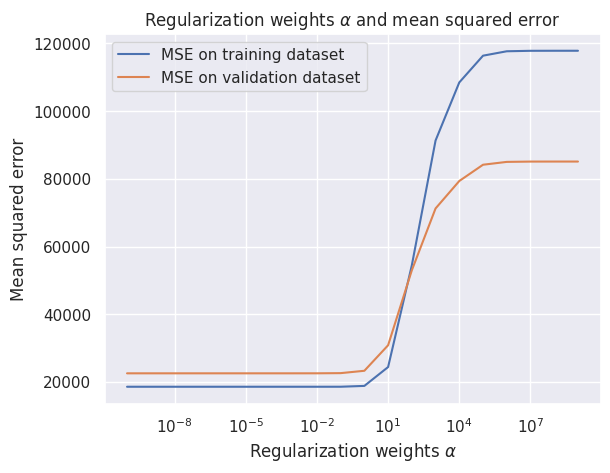

The best alpha: 1e-10


In [83]:
# Generate alpha values from 10^(-10) to 10^(10)
alpha_indices = np.arange(20)
alphas = 10.0 ** (alpha_indices - 10)

# Degree for polynomial transformation
degree = 2

# Arrays to store the training and validation MSE
mse_train_array = np.full(len(alphas), np.nan)
mse_valid_array = np.full(len(alphas), np.nan)

for alpha_index, alpha in enumerate(alphas):
    # Define the transformers
    poly = PolynomialFeatures(degree=degree)
    scaler = StandardScaler()
    onehot = OneHotEncoder(handle_unknown='ignore')

    # Apply PolynomialFeatures and Scaling only to numerical features
    numerical_transformer = Pipeline(steps=[
        ('poly', poly),
        ('scale', scaler)
    ])

    # Apply OneHotEncoder to categorical features
    categorical_transformer = Pipeline(steps=[
        ('onehot', onehot)
    ])

    # Combine numerical and categorical transformations
    preprocessor = ColumnTransformer(transformers=[
        ('num', numerical_transformer, num_without_target),
        ('cat', categorical_transformer, categorical_final)
    ])

    # Create a pipeline with preprocessing and Ridge regression with current alpha
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', Ridge(alpha=alpha))
    ])

    # Fit the model
    model_pipeline.fit(X_train, y_train)

    # Predict and calculate MSE for training and validation sets
    y_pred_train = model_pipeline.predict(X_train)
    y_pred_valid = model_pipeline.predict(X_valid)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_valid = mean_squared_error(y_valid, y_pred_valid)

    # Store the MSE values for this alpha
    mse_train_array[alpha_index] = mse_train
    mse_valid_array[alpha_index] = mse_valid
    print(f'alpha: {alpha}, Validation mean squared error: {mse_valid}.')

# Plot MSE against alphas for both training and validation sets
plt.plot(alphas, mse_train_array, label='MSE on training dataset')
plt.plot(alphas, mse_valid_array, label='MSE on validation dataset')
plt.xlabel(r'Regularization weights $\alpha$')
plt.ylabel('Mean squared error')
plt.title(r'Regularization weights $\alpha$ and mean squared error')
plt.xscale('log')
plt.legend()
plt.show()

# Select the best alpha based on minimum validation MSE
best_alpha_index = np.argmin(mse_valid_array)
best_alpha = alphas[best_alpha_index]
print('The best alpha:', best_alpha)

In [84]:
# Define transformers
degree = 2  # Degree of polynomial features
poly = PolynomialFeatures(degree=degree)
scaler = StandardScaler()
onehot = OneHotEncoder(handle_unknown='ignore')

# Pipeline for numerical features: polynomial transformation and scaling
numerical_transformer = Pipeline(steps=[
    ('poly', poly),
    ('scale', scaler)
])

# Pipeline for categorical features: one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', onehot)
])

# Combine numerical and categorical transformations
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, num_without_target),
    ('cat', categorical_transformer, categorical_final)
])

# Define a pipeline to apply preprocessing and then the Ridge regression model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=best_alpha))  # Use the best alpha found earlier
])

# Fit the model to the training data
model_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = model_pipeline.predict(X_test)

# Calculate and print MSE and R² score on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Test set Mean Squared Error (MSE): {mse_test}')
print(f'Test set R² score: {r2_test}')

Test set Mean Squared Error (MSE): 24066.53926747685
Test set R² score: 0.8144408027886618


In [85]:
# Make predictions on the test set
y_test_pred = model_pipeline.predict(X_test)

# Calculate and print MSE and R² score on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Test set Mean Squared Error (MSE): {mse_test}')
print(f'Test set R² score: {r2_test}')

Test set Mean Squared Error (MSE): 24066.53926747685
Test set R² score: 0.8144408027886618


### Lasso Regression

alpha: 1e-10, Validation mean squared error: 22532.5894753967.
alpha: 1e-09, Validation mean squared error: 22532.589473526474.
alpha: 1e-08, Validation mean squared error: 22532.58945482807.
alpha: 1e-07, Validation mean squared error: 22532.589267836705.
alpha: 1e-06, Validation mean squared error: 22532.58739793379.
alpha: 1e-05, Validation mean squared error: 22532.56869927634.
alpha: 0.0001, Validation mean squared error: 22532.391887878377.
alpha: 0.001, Validation mean squared error: 22530.61725626558.
alpha: 0.01, Validation mean squared error: 22522.642625587843.
alpha: 0.1, Validation mean squared error: 22464.006650097574.
alpha: 1.0, Validation mean squared error: 23487.830960774936.
alpha: 10.0, Validation mean squared error: 37422.74392152054.
alpha: 100.0, Validation mean squared error: 84383.0522421148.
alpha: 1000.0, Validation mean squared error: 85114.3348108734.
alpha: 10000.0, Validation mean squared error: 85114.3348108734.
alpha: 100000.0, Validation mean squared

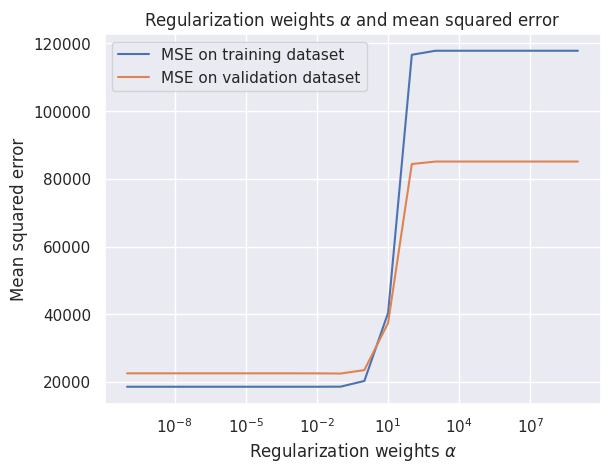

The best alpha: 0.1


In [86]:
# Generate alpha values from 10^(-10) to 10^(10)
alpha_indices = np.arange(20)
alphas = 10.0 ** (alpha_indices - 10)

# Degree for polynomial transformation
degree = 2

# Arrays to store the training and validation MSE
mse_train_array = np.full(len(alphas), np.nan)
mse_valid_array = np.full(len(alphas), np.nan)

for alpha_index, alpha in enumerate(alphas):
    # Define the transformers
    poly = PolynomialFeatures(degree=degree)
    scaler = StandardScaler()
    onehot = OneHotEncoder(handle_unknown='ignore')

    # Apply PolynomialFeatures and Scaling only to numerical features
    numerical_transformer = Pipeline(steps=[
        ('poly', poly),
        ('scale', scaler)
    ])

    # Apply OneHotEncoder to categorical features
    categorical_transformer = Pipeline(steps=[
        ('onehot', onehot)
    ])

    # Combine numerical and categorical transformations
    preprocessor = ColumnTransformer(transformers=[
        ('num', numerical_transformer, num_without_target),
        ('cat', categorical_transformer, categorical_final)
    ])

    # Create a pipeline with preprocessing and Lasso regression with current alpha
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', Lasso(alpha=alpha, max_iter=10000))
    ])

    # Fit the model
    model_pipeline.fit(X_train, y_train)

    # Predict and calculate MSE for training and validation sets
    y_pred_train = model_pipeline.predict(X_train)
    y_pred_valid = model_pipeline.predict(X_valid)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_valid = mean_squared_error(y_valid, y_pred_valid)

    # Store the MSE values for this alpha
    mse_train_array[alpha_index] = mse_train
    mse_valid_array[alpha_index] = mse_valid
    print(f'alpha: {alpha}, Validation mean squared error: {mse_valid}.')

# Plot MSE against alphas for both training and validation sets
plt.plot(alphas, mse_train_array, label='MSE on training dataset')
plt.plot(alphas, mse_valid_array, label='MSE on validation dataset')
plt.xlabel(r'Regularization weights $\alpha$')
plt.ylabel('Mean squared error')
plt.title(r'Regularization weights $\alpha$ and mean squared error')
plt.xscale('log')
plt.legend()
plt.show()

# Select the best alpha based on minimum validation MSE
best_alpha_index = np.argmin(mse_valid_array)
best_alpha = alphas[best_alpha_index]
print('The best alpha:', best_alpha)

In [87]:
# Define transformers
degree = 2  # Degree of polynomial features
poly = PolynomialFeatures(degree=degree)
scaler = StandardScaler()
onehot = OneHotEncoder(handle_unknown='ignore')

# Pipeline for numerical features: polynomial transformation and scaling
numerical_transformer = Pipeline(steps=[
    ('poly', poly),
    ('scale', scaler)
])

# Pipeline for categorical features: one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', onehot)
])

# Combine numerical and categorical transformations
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, num_without_target),
    ('cat', categorical_transformer, categorical_final)
])

# Define a pipeline to apply preprocessing and then the Lasso regression model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=best_alpha, max_iter=10000))  # Use the best alpha found earlier
])

# Fit the model to the training data
model_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = model_pipeline.predict(X_test)

# Calculate and print MSE and R² score on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Test set Mean Squared Error (MSE): {mse_test}')
print(f'Test set R² score: {r2_test}')

Test set Mean Squared Error (MSE): 24032.30820393438
Test set R² score: 0.8147047330779333


### Random Forest

In [88]:
# Separate features and target variable
X = df.drop(columns=['Lifespan','microstructure', 'seedLocation'])
y = df['Lifespan']

# Split the data into training, validation, and test sets
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.10, shuffle=True, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.12, shuffle=True, random_state=0)

# Define numerical and categorical feature columns
num_without_target = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Define the transformers
scaler = StandardScaler()
onehot = OneHotEncoder(handle_unknown='ignore')

# Apply Scaling to numerical features
numerical_transformer = Pipeline(steps=[
    ('scale', scaler)
])

# Apply OneHotEncoder to categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', onehot)
])

# Combine numerical and categorical transformations using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, num_without_target),
    ('cat', categorical_transformer, categorical_final)
])

scal_encod_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor)
])

X_train=scal_encod_pipeline.fit_transform(X_train)
X_valid=scal_encod_pipeline.fit_transform(X_valid)
X_test=scal_encod_pipeline.fit_transform(X_test)

In [89]:
# Define updated hyperparameter ranges
n_estimators_range = [50, 100, 200, 300]
max_depth_range = [None, 10, 20, 30]
max_features_range = [None, 'sqrt', 'log2']  # Replace 'auto' with None for compatibility

# Initialize lists to store results
mse_train_list = []
mse_valid_list = []
R2_train_list = []
R2_valid_list = []

# Loop through all combinations of hyperparameters
for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        for max_features in max_features_range:
            print(f"n_estimators: {n_estimators}, max_depth: {max_depth}, max_features: {max_features}")

            # Create a pipeline that applies preprocessing and then the model
            model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features, random_state=0)

            # Fit the model on the training set
            model.fit(X_train, y_train)

            # Make predictions and evaluate on training and validation sets
            y_pred_train = model.predict(X_train)
            y_pred_valid = model.predict(X_valid)

            mse_train = mean_squared_error(y_train, y_pred_train)
            mse_valid = mean_squared_error(y_valid, y_pred_valid)
            R2_train = r2_score(y_train, y_pred_train)
            R2_valid = r2_score(y_valid, y_pred_valid)

            mse_train_list.append((mse_train, n_estimators, max_depth, max_features))
            mse_valid_list.append((mse_valid, n_estimators, max_depth, max_features))
            R2_train_list.append(R2_train)
            R2_valid_list.append(R2_valid)

            # Print the results
            print("Training Set MSE:", mse_train)
            print("Training Set R2 Score:", R2_train)
            print("Validation Set MSE:", mse_valid)
            print("Validation Set R2 Score:", R2_valid)

# Identifying the best parameters (if needed)
best_params = min(mse_valid_list, key=lambda x: x[0])
best_n_estimators, best_max_depth, best_max_features = best_params[1], best_params[2], best_params[3]
print(f'\nThe best parameters: n_estimators={best_n_estimators}, max_depth={best_max_depth}, max_features={best_max_features}')


n_estimators: 50, max_depth: None, max_features: None
Training Set MSE: 988.0210893851498
Training Set R2 Score: 0.9916167692238598
Validation Set MSE: 12331.83956171704
Validation Set R2 Score: 0.8542203374039087
n_estimators: 50, max_depth: None, max_features: sqrt
Training Set MSE: 3170.9772107838858
Training Set R2 Score: 0.9730946697095045
Validation Set MSE: 21670.654880986298
Validation Set R2 Score: 0.7438224247910459
n_estimators: 50, max_depth: None, max_features: log2
Training Set MSE: 3170.9772107838858
Training Set R2 Score: 0.9730946697095045
Validation Set MSE: 21670.654880986298
Validation Set R2 Score: 0.7438224247910459
n_estimators: 50, max_depth: 10, max_features: None
Training Set MSE: 1305.470544308325
Training Set R2 Score: 0.9889232517787646
Validation Set MSE: 12425.17951079904
Validation Set R2 Score: 0.8531169281180668
n_estimators: 50, max_depth: 10, max_features: sqrt
Training Set MSE: 6880.609805755491
Training Set R2 Score: 0.9416189183592054
Validation S

In [90]:
# Final model training and test evaluation
# Retrain the model with the best parameters on the full training/validation set
final_model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, max_features=best_max_features, random_state=0)
final_model.fit(X_train, y_train)

# Test set predictions and evaluation
y_pred_test = final_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
R2_test = r2_score(y_test, y_pred_test)

print("Test Set MSE:", mse_test)
print("Test Set R2 Score:", R2_test)

Test Set MSE: 40010.09431347341
Test Set R2 Score: 0.6915118996277516


## Artificial Neural Network Model

In [91]:
X = df.drop(columns=['Lifespan','microstructure', 'seedLocation'])
y = df['Lifespan']

# Split the data into training, validation, and test sets
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.10, shuffle=True, random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.11, shuffle=True, random_state=0)

##### making a pipeline for scaling and encoding the data

In [92]:
scaler = StandardScaler()
onehot = OneHotEncoder(handle_unknown='ignore')

# Apply encoder and scaling on data
numerical_transformer = Pipeline(steps=[
    ('scale', scaler)
])

categorical_transformer = Pipeline(steps=[
    ('onehot', onehot)
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, num_without_target),
    ('cat', categorical_transformer, categorical_final)
])

scal_encod_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

scal_encod_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['coolingRate', 'quenchTime',
                                                   'forgeTime', 'HeatTreatTime',
                                                   'Nickel%', 'Iron%',
                                                   'Cobalt%', 'Chromium%',
                                                   'smallDefects',
                                                   'largeDefects',
                                                   'sliverDefects']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['partType', 'castType'])]))])

##### spliting the dataset into train, test and valid

In [93]:
X = df.drop(columns=['Lifespan','microstructure', 'seedLocation'])
y = df['Lifespan']

# Split the data into training, validation, and test sets
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.10, shuffle=True, random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.11, shuffle=True, random_state=0)

In [94]:
# Apply the pileline on spliting data
X_train=scal_encod_pipeline.fit_transform(X_train)
X_valid=scal_encod_pipeline.fit_transform(X_valid)
X_test=scal_encod_pipeline.fit_transform(X_test)

In [95]:
print('The shape of `X_train`:', X_train.shape)
print('The shape of `X_valid`:', X_valid.shape)
print('The shape of `X_test`:', X_test.shape)

The shape of `X_train`: (801, 18)
The shape of `X_valid`: (99, 18)
The shape of `X_test`: (100, 18)


##### Define neural network

In [96]:
# Define neural network layers
first_layer = Dense(units=5, activation=relu)
second_layer = Dense(units=5, activation=relu)
third_layer = Dense(units=1, activation=linear)

# Compose Layers
# Extract the number of features for Networks input dimension
features = X_train.shape[1:]
# Define the virtual input
input = Input(shape=features)

# Call the layers in a raw to get a virtual output
output =first_layer(input)
output =second_layer(output)
output = third_layer(output)

# Deifne the neural network model
model = Model(inputs=[input], outputs=[output], name='multi_layer_perceptron')

model.summary()

Model: "multi_layer_perceptron"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 18)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │              95 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1854743106289664.0000 - val_loss: 2074160660480.0000
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1755674312704.0000 - val_loss: 1002281107456.0000
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 848399237120.0000 - val_loss: 484330438656.0000
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 409947308032.0000 - val_loss: 234045292544.0000
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 198099615744.0000 - val_loss: 113100881920.0000
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 95719464960.0000 - val_loss: 54656679936.0000
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46254764032.0000 - val_loss: 26414125056.0000
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22343649280.0000 - val_loss: 12765825024.0000
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10800849920.0000 - val_loss: 6170232320.0000
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/s

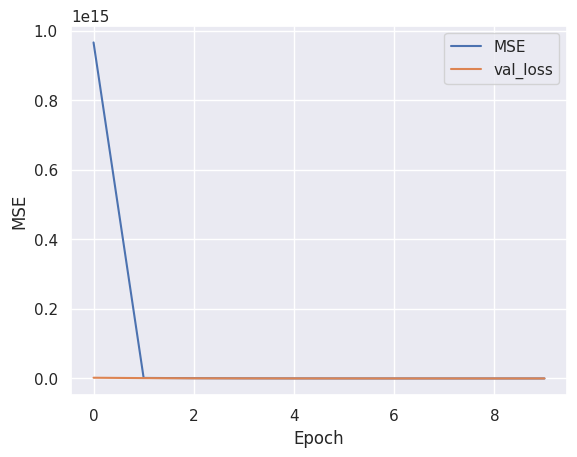

In [97]:
# Specify stochastic gradient descent
# mse as loss function
sgd = SGD(learning_rate = 0.01)
mse = MeanSquaredError()
model.compile(optimizer=sgd, loss=mse)

history = model.fit(X_train,y_train, batch_size=45, epochs=10, validation_data=(X_valid,y_valid))

# Plot validation MSE, always nice to have plots to help us visualize things!
plt.plot(history.history['loss'], label='MSE')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

In [98]:
mse_on_test = model.evaluate(X_test,y_test)
print('The mean squared error on the test data:', mse_on_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2975184640.0000 
The mean squared error on the test data: 2977369088.0


In [99]:
y_test_pred = model.predict(X_test)
mse = sklearn.metrics.mean_squared_error(y_test,y_test_pred)
r2_score = sklearn.metrics.r2_score(y_test,y_test_pred)
print('MSE:',mse)
print('R2_Score:',r2_score)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
MSE: 2977368833.264382
R2_Score: -22955.278190325767


#### Changing the activation function

The shape of `X_train`: (801, 18)
The shape of `X_valid`: (99, 18)
The shape of `X_test`: (100, 18)


Model: "multi_layer_perceptron"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 18)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 5)                   │              95 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1669743.6250 - val_loss: 1266485.1250
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1146503.0000 - val_loss: 860540.4375
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 796175.1875 - val_loss: 595471.1875
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 535127.9375 - val_loss: 421812.4062
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 400910.9688 - val_loss: 308007.3438
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 307606.5312 - val_loss: 233092.0469
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 227914.1250 - val_loss: 183763.3125
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 181637.3594 - val_loss: 150888.4688
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 169439.8750 - val_loss: 129247.6328
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 149250.0000 - val_loss: 114670.0391


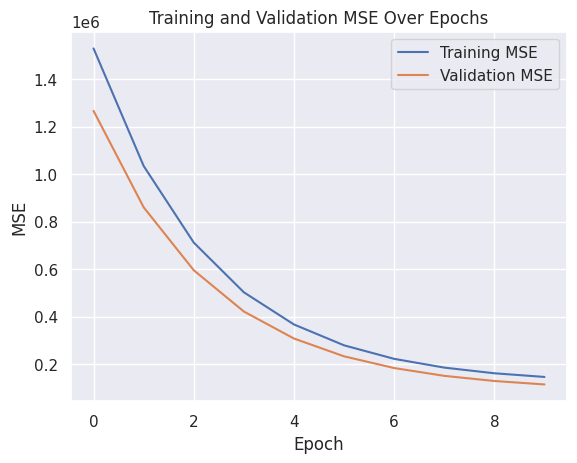

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 134124.1406
The mean squared error on the test data: 147531.484375
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MSE: 147531.4782427021
R2_Score: -0.13750557825790444


In [100]:
X = df.drop(columns=['Lifespan','microstructure', 'seedLocation'])
y = df['Lifespan']

# Split data into training, validation, and test sets
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.10, shuffle=True, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.11, shuffle=True, random_state=0)

# Define preprocessor: scaling numerical features and encoding categorical features
scaler = StandardScaler()
onehot = OneHotEncoder(handle_unknown='ignore')

numerical_transformer = Pipeline(steps=[('scale', scaler)])
categorical_transformer = Pipeline(steps=[('onehot', onehot)])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, num_without_target),
    ('cat', categorical_transformer, categorical_final)
])

# Apply preprocessing pipeline on train, validation, and test data
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
X_test = preprocessor.transform(X_test)

print('The shape of `X_train`:', X_train.shape)
print('The shape of `X_valid`:', X_valid.shape)
print('The shape of `X_test`:', X_test.shape)

# Define the neural network architecture
input_layer = Input(shape=(X_train.shape[1],))
first_layer = Dense(units=5, activation='sigmoid')(input_layer)
second_layer = Dense(units=5, activation='sigmoid')(first_layer)
output_layer = Dense(units=1, activation='linear')(second_layer)

# Define and compile the model
model = Model(inputs=input_layer, outputs=output_layer, name='multi_layer_perceptron')
model.compile(optimizer=SGD(learning_rate=0.001), loss=MeanSquaredError())
model.summary()

# Train the model
history = model.fit(X_train, y_train, batch_size=45, epochs=10, validation_data=(X_valid, y_valid))

# Plot validation and training loss over epochs
plt.plot(history.history['loss'], label='Training MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.title("Training and Validation MSE Over Epochs")
plt.show()

# Evaluate model on the test set
mse_on_test = model.evaluate(X_test, y_test)
print('The mean squared error on the test data:', mse_on_test)

y_test_pred = model.predict(X_test)
mse = sklearn.metrics.mean_squared_error(y_test,y_test_pred)
r2_score = sklearn.metrics.r2_score(y_test,y_test_pred)
print('MSE:',mse)
print('R2_Score:',r2_score)

# Multi-Class Classification

###### Using clustering method to make categories on Lifesapn feature

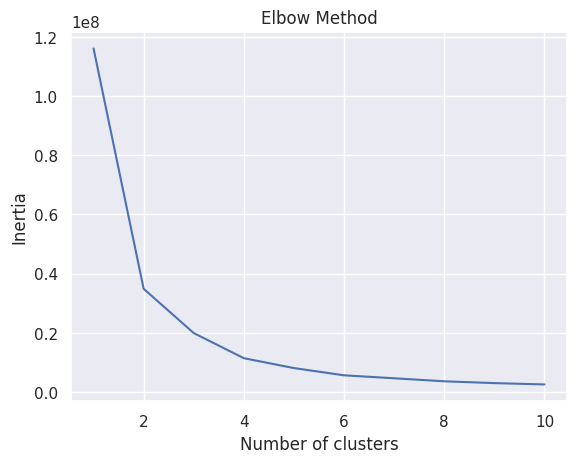

In [101]:
df_classification = df.copy()

from sklearn.cluster import KMeans


# Assuming 'lifespan' and other relevant features are in the dataframe
X = df_classification[['Lifespan','Nickel%','coolingRate', 'smallDefects','HeatTreatTime','Iron%']]

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Choose an optimal k based on the elbow plot
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k)
df_classification['cluster'] = kmeans.fit_predict(X)

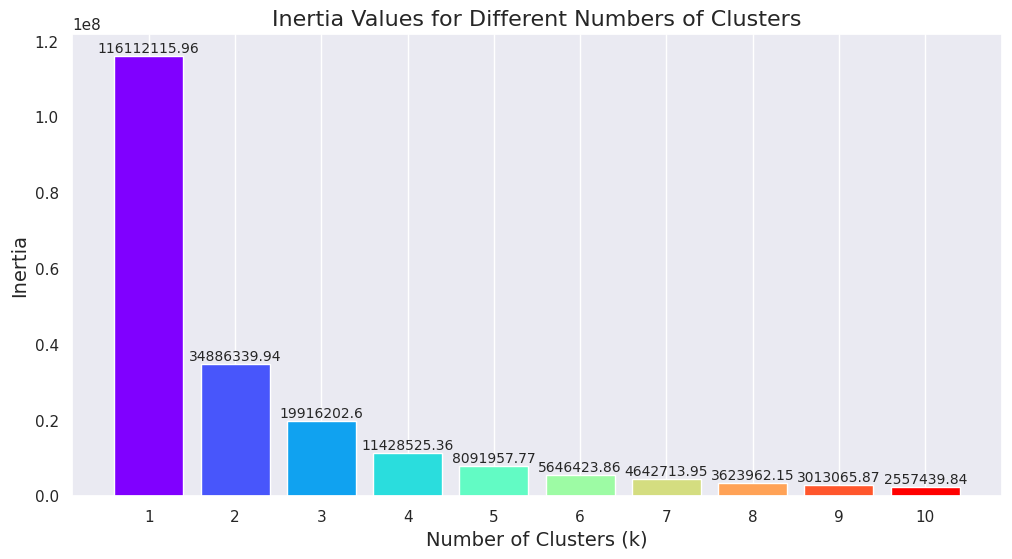

In [102]:
inertia_summary = pd.DataFrame({'Number of Clusters': k_range, 'Inertia': inertia})

colors = plt.cm.rainbow(np.linspace(0, 1, len(inertia_summary)))

plt.figure(figsize=(12, 6))
bars = plt.bar(inertia_summary['Number of Clusters'], inertia_summary['Inertia'], color=colors)
plt.xticks(inertia_summary['Number of Clusters'])
plt.title('Inertia Values for Different Numbers of Clusters', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.grid(axis='y')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.show()

In [103]:
# Assuming 'cluster' is the column with cluster labels
cluster_ranges = df_classification.groupby('cluster')['Lifespan'].agg(['min', 'max'])
print("Cluster ranges based on 'Lifespan':\n", cluster_ranges)

Cluster ranges based on 'Lifespan':
              min      max
cluster                  
0        1300.66  1527.35
1         850.00  1078.50
2        1082.10  1299.90
3        1774.38  2134.53
4         417.99   845.40
5        1529.60  1761.96


In [104]:

# Reassign the cluster labels
df_classification['Target_hour'] = df_classification['cluster']

In [105]:
# Group by 'Target_hour' and calculate min and max for 'Lifespan'
cluster_ranges = df_classification.groupby('Target_hour')['Lifespan'].agg(['min', 'max'])
print(cluster_ranges)

                 min      max
Target_hour                  
0            1300.66  1527.35
1             850.00  1078.50
2            1082.10  1299.90
3            1774.38  2134.53
4             417.99   845.40
5            1529.60  1761.96


In [106]:
print(df_classification['Target_hour'].value_counts())
print(df_classification['cluster'].value_counts())

Target_hour
2    233
0    204
1    204
5    178
3     97
4     84
Name: count, dtype: int64
cluster
2    233
0    204
1    204
5    178
3     97
4     84
Name: count, dtype: int64


In [107]:
df_classification = df_classification.drop(columns=['cluster','Lifespan'])

In [108]:
df_classification.head()

,partType,microstructure,coolingRate,quenchTime,forgeTime,HeatTreatTime,Nickel%,Iron%,Cobalt%,Chromium%,smallDefects,largeDefects,sliverDefects,seedLocation,castType,Target_hour
0,Nozzle,equiGrain,13,3.84,6.47,46.87,65.73,16.52,16.82,0.93,10,0,0,Bottom,Die,0
1,Block,singleGrain,19,2.62,3.48,44.70,54.22,35.38,6.14,4.26,19,0,0,Bottom,Investment,3
2,Blade,equiGrain,28,0.76,1.34,9.54,51.83,35.95,8.81,3.41,35,3,0,Bottom,Investment,4
3,Nozzle,colGrain,9,2.01,2.19,20.29,57.03,23.33,16.86,2.78,0,1,0,Top,Continuous,2
4,Blade,colGrain,16,4.13,3.87,16.13,59.62,27.37,11.45,1.56,10,0,0,Top,Die,3


### Logistic Regression

Validation Accuracy: 0.1818
Confusion matrix:
 [[0.04040404 0.13131313 0.12121212 0.         0.02020202 0.        ]
 [0.03030303 0.05050505 0.07070707 0.01010101 0.03030303 0.01010101]
 [0.04040404 0.06060606 0.07070707 0.         0.03030303 0.04040404]
 [0.02020202 0.         0.07070707 0.         0.         0.02020202]
 [0.         0.         0.         0.         0.02020202 0.        ]
 [0.03030303 0.03030303 0.05050505 0.         0.         0.        ]]


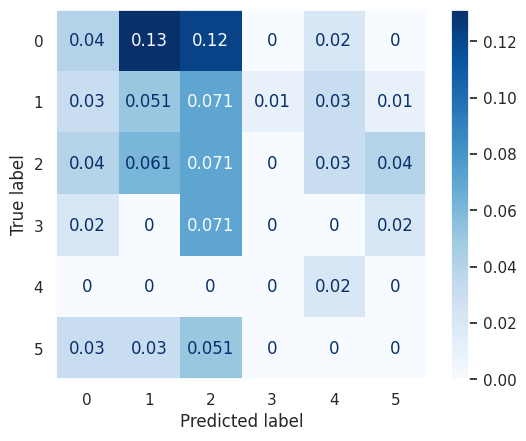

              precision    recall  f1-score   support

           0       0.25      0.13      0.17        31
           1       0.19      0.25      0.21        20
           2       0.18      0.29      0.23        24
           3       0.00      0.00      0.00        11
           4       0.20      1.00      0.33         2
           5       0.00      0.00      0.00        11

    accuracy                           0.18        99
   macro avg       0.14      0.28      0.16        99
weighted avg       0.16      0.18      0.16        99



In [109]:
# Separate the features (X) and the target variable (y)
X = df_classification.drop(columns=['Target_hour','microstructure', 'seedLocation'])  # Drop 'Target_hour' to create the feature set
y = df_classification['Target_hour']  # Set 'Target_hour' as the target variable

# Split the data into training, validation, and test sets
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.10,  random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.11,  random_state=0)

# Identify numerical and categorical columns
num_without_target = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Define transformers
scaler = StandardScaler()
onehot = OneHotEncoder(handle_unknown='ignore')

# Create separate transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[('scale', scaler)])
categorical_transformer = Pipeline(steps=[('onehot', onehot)])

# Combine transformations into a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, num_without_target),
    ('cat', categorical_transformer, categorical_final)
])

# Apply transformations on X_train, X_valid, and X_test
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
X_test = preprocessor.transform(X_test)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on validation data
y_pred_valid = model.predict(X_valid)

# Evaluate the model performance on validation data
print('Validation Accuracy: {:.4f}'.format(accuracy_score(y_valid, y_pred_valid)))

# Confusion matrix
confusion_mat = confusion_matrix(y_valid, y_pred_valid, normalize='all')
print(f'Confusion matrix:\n', confusion_mat)

# Visualize the confusion matrix
ConfusionMatrixDisplay(confusion_mat).plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

# Print classification report for detailed metrics
print(classification_report(y_valid, y_pred_valid))

### Hyperparameter selection

C: 1e-10, F1 Score (Validation): 0.06467661691542288
C: 1e-09, F1 Score (Validation): 0.06467661691542288
C: 1e-08, F1 Score (Validation): 0.06467661691542288
C: 1e-07, F1 Score (Validation): 0.06467661691542288
C: 1e-06, F1 Score (Validation): 0.06467661691542288
C: 1e-05, F1 Score (Validation): 0.06467661691542288
C: 0.0001, F1 Score (Validation): 0.06467661691542288
C: 0.001, F1 Score (Validation): 0.06467661691542288
C: 0.01, F1 Score (Validation): 0.2073974796161497
C: 0.1, F1 Score (Validation): 0.15937830687830687
C: 1.0, F1 Score (Validation): 0.14349995070491964
C: 10.0, F1 Score (Validation): 0.13040216086434575
C: 100.0, F1 Score (Validation): 0.13040216086434575
C: 1000.0, F1 Score (Validation): 0.13040216086434575
C: 10000.0, F1 Score (Validation): 0.13040216086434575
C: 100000.0, F1 Score (Validation): 0.13040216086434575
C: 1000000.0, F1 Score (Validation): 0.13040216086434575
C: 10000000.0, F1 Score (Validation): 0.13040216086434575
C: 100000000.0, F1 Score (Validation)

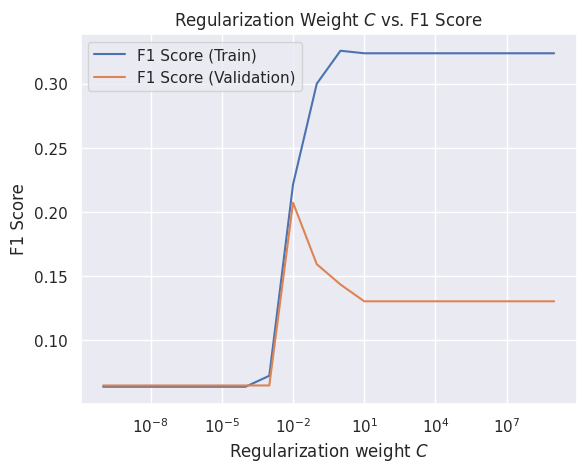

Best C: 0.01

Accuracy: 0.2400
Precision (Macro): 0.1574
Recall (Macro): 0.1972
F1 Score (Macro): 0.1566
Balanced Accuracy: 0.1972
              precision    recall  f1-score   support

           0     0.2143    0.1875    0.2000        16
           1     0.3077    0.3333    0.3200        24
           2     0.2222    0.6000    0.3243        20
           3     0.0000    0.0000    0.0000        13
           4     0.0000    0.0000    0.0000        11
           5     0.2000    0.0625    0.0952        16

    accuracy                         0.2400       100
   macro avg     0.1574    0.1972    0.1566       100
weighted avg     0.1846    0.2400    0.1889       100



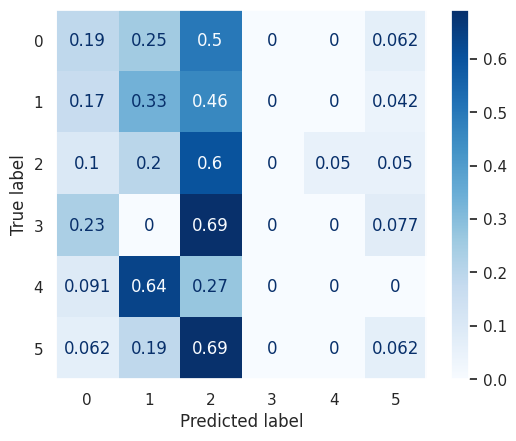

In [110]:
# Set up C values for regularization
C_indices = np.arange(20)
Cs = 10.0 ** (C_indices - 10)
f1_train_array = np.full([len(Cs)], np.nan)
f1_valid_array = np.full([len(Cs)], np.nan)

# Data Splitting
X = df_classification.drop(columns=['Target_hour','microstructure', 'seedLocation'])
y = df_classification['Target_hour']
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.10, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.12, random_state=0)

# Iterate over C values
for C_index, C in zip(C_indices, Cs):
    model_pipeline = Pipeline(steps=[
        ('preprocessor', ColumnTransformer(
            transformers=[
                ('num', Pipeline([('scaler', StandardScaler())]), num_without_target),
                ('cat', Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_final)
            ])),
        ('model', LogisticRegression(C=C, multi_class='multinomial', solver='lbfgs', max_iter=500))  # Set multi_class
    ])

    # Fit model on training data
    model_pipeline.fit(X_train, y_train)

    # Calculate and store F1 scores
    y_pred_train = model_pipeline.predict(X_train)
    y_pred_valid = model_pipeline.predict(X_valid)
    f1_train_array[C_index] = f1_score(y_train, y_pred_train, average='macro')
    f1_valid_array[C_index] = f1_score(y_valid, y_pred_valid, average='macro')
    print(f'C: {C}, F1 Score (Validation): {f1_valid_array[C_index]}')

# Plot F1 scores vs. regularization weights
plt.plot(Cs, f1_train_array, label='F1 Score (Train)')
plt.plot(Cs, f1_valid_array, label='F1 Score (Validation)')
plt.xscale('log')
plt.xlabel(r'Regularization weight $C$')
plt.ylabel('F1 Score')
plt.legend()
plt.title(r'Regularization Weight $C$ vs. F1 Score')
plt.show()

# Determine best C and re-fit model
best_C = Cs[np.nanargmax(f1_valid_array)]
print(f'Best C: {best_C}')

# Final Model Testing
model_pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', Pipeline([('scaler', StandardScaler())]), num_without_target),
            ('cat', Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_final)
        ])),
    ('model', LogisticRegression(C=best_C, multi_class='multinomial', solver='lbfgs', max_iter=500))
])

model_pipeline.fit(X_train_valid, y_train_valid)
y_pred_test = model_pipeline.predict(X_test)

# Model Evaluation on Test Set
print('\nAccuracy: {:.4f}'.format(accuracy_score(y_test, y_pred_test)))
print('Precision (Macro): {:.4f}'.format(precision_score(y_test, y_pred_test, average="macro")))
print('Recall (Macro): {:.4f}'.format(recall_score(y_test, y_pred_test, average="macro")))
print('F1 Score (Macro): {:.4f}'.format(f1_score(y_test, y_pred_test, average="macro")))

# Balanced accuracy is useful for multi-class evaluation
print('Balanced Accuracy: {:.4f}'.format(balanced_accuracy_score(y_test, y_pred_test)))

# Confusion Matrix and Classification Report
confusion_mat = sklearn.metrics.confusion_matrix(y_test, y_pred_test, normalize='true')
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat).plot(cmap=plt.cm.Blues)
plt.grid(False)
print(sklearn.metrics.classification_report(y_test, y_pred_test, digits=4))

###  k-Nearest Neighbours

Validation Accuracy: 0.2525
Confusion matrix:
 [[0.1010101  0.05050505 0.07070707 0.02020202 0.         0.07070707]
 [0.05050505 0.04040404 0.09090909 0.01010101 0.01010101 0.        ]
 [0.09090909 0.05050505 0.05050505 0.         0.02020202 0.03030303]
 [0.04040404 0.         0.01010101 0.03030303 0.         0.03030303]
 [0.         0.         0.02020202 0.         0.         0.        ]
 [0.04040404 0.         0.02020202 0.01010101 0.01010101 0.03030303]]


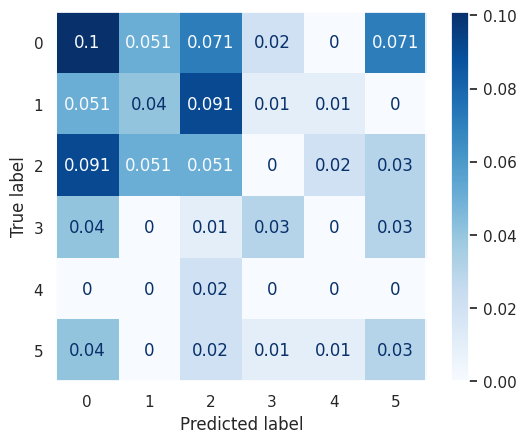

              precision    recall  f1-score   support

           0       0.31      0.32      0.32        31
           1       0.29      0.20      0.24        20
           2       0.19      0.21      0.20        24
           3       0.43      0.27      0.33        11
           4       0.00      0.00      0.00         2
           5       0.19      0.27      0.22        11

    accuracy                           0.25        99
   macro avg       0.23      0.21      0.22        99
weighted avg       0.27      0.25      0.26        99


Accuracy: 0.2800
Precision (Macro): 0.3859
Recall (Macro): 0.2800
F1 Score (Macro): 0.3095
Balanced Accuracy: 0.2800
              precision    recall  f1-score   support

           0     0.0833    0.1250    0.1000        16
           1     0.4000    0.3333    0.3636        24
           2     0.2727    0.3000    0.2857        20
           3     0.6667    0.4615    0.5455        13
           4     0.7500    0.2727    0.4000        11
           5  

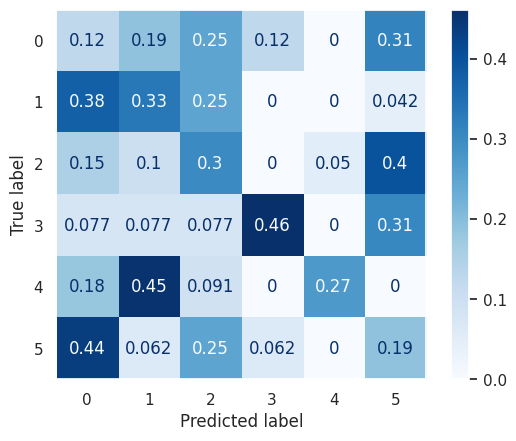

In [111]:
# Separate the features (X) and the target variable (y)
X = df_classification.drop(columns=['Target_hour','microstructure', 'seedLocation'])  # Drop 'Target_hour' to create the feature set
y = df_classification['Target_hour']  # Set 'Target_hour' as the target variable

# Split the data into training, validation, and test sets
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.10,  random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.11,  random_state=0)

# Identify numerical and categorical columns
num_without_target = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Define transformers
scaler = StandardScaler()
onehot = OneHotEncoder(handle_unknown='ignore')

# Create separate transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[('scale', scaler)])
categorical_transformer = Pipeline(steps=[('onehot', onehot)])

# Combine transformations into a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, num_without_target),
    ('cat', categorical_transformer, categorical_final)
])

# Apply transformations on X_train, X_valid, and X_test
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
X_test = preprocessor.transform(X_test)


# Initialize and train the model
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Predict on validation data
y_pred_valid = model.predict(X_valid)

# Evaluate the model performance on validation data
print('Validation Accuracy: {:.4f}'.format(accuracy_score(y_valid, y_pred_valid)))

# Confusion matrix
confusion_mat = confusion_matrix(y_valid, y_pred_valid, normalize='all')
print(f'Confusion matrix:\n', confusion_mat)

# Visualize the confusion matrix
ConfusionMatrixDisplay(confusion_mat).plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

# Print classification report for detailed metrics
print(classification_report(y_valid, y_pred_valid))

y_pred_test = model.predict(X_test)

# Model Evaluation on Test Set
print('\nAccuracy: {:.4f}'.format(accuracy_score(y_test, y_pred_test)))
print('Precision (Macro): {:.4f}'.format(precision_score(y_test, y_pred_test, average="macro")))
print('Recall (Macro): {:.4f}'.format(recall_score(y_test, y_pred_test, average="macro")))
print('F1 Score (Macro): {:.4f}'.format(f1_score(y_test, y_pred_test, average="macro")))

# Balanced accuracy is useful for multi-class evaluation
print('Balanced Accuracy: {:.4f}'.format(balanced_accuracy_score(y_test, y_pred_test)))

# Confusion Matrix and Classification Report
confusion_mat = sklearn.metrics.confusion_matrix(y_test, y_pred_test, normalize='true')
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat).plot(cmap=plt.cm.Blues)
plt.grid(False)
print(sklearn.metrics.classification_report(y_test, y_pred_test, digits=4))

### Decision Tree

Validation Accuracy: 0.6566
Confusion matrix:
 [[0.22222222 0.         0.06060606 0.01010101 0.         0.02020202]
 [0.         0.13131313 0.05050505 0.         0.02020202 0.        ]
 [0.04040404 0.06060606 0.14141414 0.         0.         0.        ]
 [0.         0.         0.         0.09090909 0.         0.02020202]
 [0.         0.01010101 0.         0.         0.01010101 0.        ]
 [0.03030303 0.         0.         0.02020202 0.         0.06060606]]


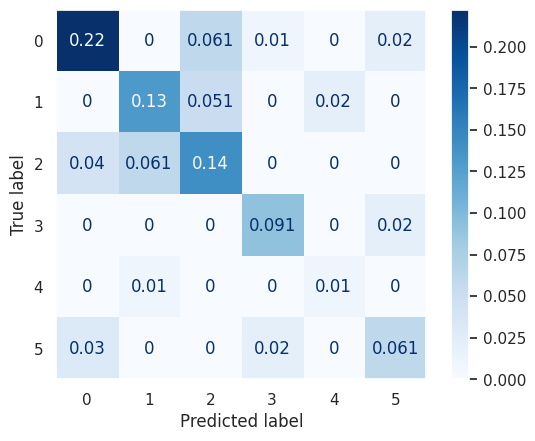

              precision    recall  f1-score   support

           0       0.76      0.71      0.73        31
           1       0.65      0.65      0.65        20
           2       0.56      0.58      0.57        24
           3       0.75      0.82      0.78        11
           4       0.33      0.50      0.40         2
           5       0.60      0.55      0.57        11

    accuracy                           0.66        99
   macro avg       0.61      0.63      0.62        99
weighted avg       0.66      0.66      0.66        99


Accuracy: 0.6100
Precision (Macro): 0.6451
Recall (Macro): 0.6116
F1 Score (Macro): 0.6207
Balanced Accuracy: 0.6116
              precision    recall  f1-score   support

           0     0.5000    0.6250    0.5556        16
           1     0.6364    0.5833    0.6087        24
           2     0.5000    0.5500    0.5238        20
           3     0.9091    0.7692    0.8333        13
           4     0.7143    0.4545    0.5556        11
           5  

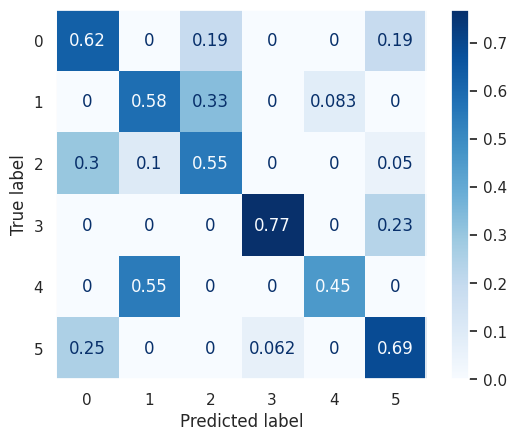

In [112]:
# Initialize and train the model
model =  DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict on validation data
y_pred_valid = model.predict(X_valid)

# Evaluate the model performance on validation data
print('Validation Accuracy: {:.4f}'.format(accuracy_score(y_valid, y_pred_valid)))

# Confusion matrix
confusion_mat = confusion_matrix(y_valid, y_pred_valid, normalize='all')
print(f'Confusion matrix:\n', confusion_mat)

# Visualize the confusion matrix
ConfusionMatrixDisplay(confusion_mat).plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

# Print classification report for detailed metrics
print(classification_report(y_valid, y_pred_valid))

y_pred_test = model.predict(X_test)

# Model Evaluation on Test Set
print('\nAccuracy: {:.4f}'.format(accuracy_score(y_test, y_pred_test)))
print('Precision (Macro): {:.4f}'.format(precision_score(y_test, y_pred_test, average="macro")))
print('Recall (Macro): {:.4f}'.format(recall_score(y_test, y_pred_test, average="macro")))
print('F1 Score (Macro): {:.4f}'.format(f1_score(y_test, y_pred_test, average="macro")))

# Balanced accuracy is useful for multi-class evaluation
print('Balanced Accuracy: {:.4f}'.format(balanced_accuracy_score(y_test, y_pred_test)))

# Confusion Matrix and Classification Report
confusion_mat = sklearn.metrics.confusion_matrix(y_test, y_pred_test, normalize='true')
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat).plot(cmap=plt.cm.Blues)
plt.grid(False)
print(sklearn.metrics.classification_report(y_test, y_pred_test, digits=4))

### Random Forests

Validation Accuracy: 0.6667
Confusion matrix:
 [[0.22222222 0.         0.03030303 0.         0.         0.06060606]
 [0.         0.14141414 0.06060606 0.         0.         0.        ]
 [0.06060606 0.02020202 0.13131313 0.         0.         0.03030303]
 [0.         0.         0.         0.06060606 0.         0.05050505]
 [0.         0.         0.         0.         0.02020202 0.        ]
 [0.02020202 0.         0.         0.         0.         0.09090909]]


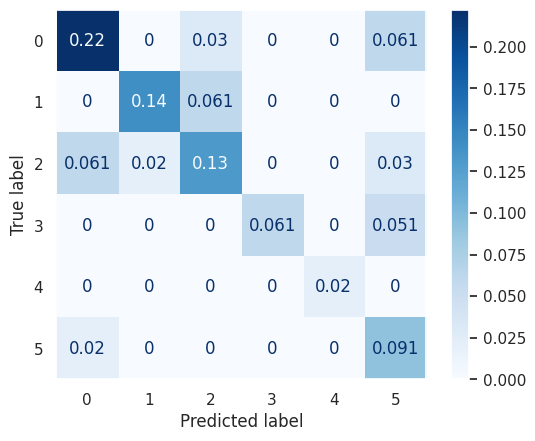

              precision    recall  f1-score   support

           0       0.73      0.71      0.72        31
           1       0.88      0.70      0.78        20
           2       0.59      0.54      0.57        24
           3       1.00      0.55      0.71        11
           4       1.00      1.00      1.00         2
           5       0.39      0.82      0.53        11

    accuracy                           0.67        99
   macro avg       0.77      0.72      0.72        99
weighted avg       0.72      0.67      0.68        99


Accuracy: 0.5700
Precision (Macro): 0.6511
Recall (Macro): 0.5618
F1 Score (Macro): 0.5763
Balanced Accuracy: 0.5618
              precision    recall  f1-score   support

           0     0.3704    0.6250    0.4651        16
           1     0.7143    0.6250    0.6667        24
           2     0.6000    0.6000    0.6000        20
           3     1.0000    0.3846    0.5556        13
           4     0.7778    0.6364    0.7000        11
           5  

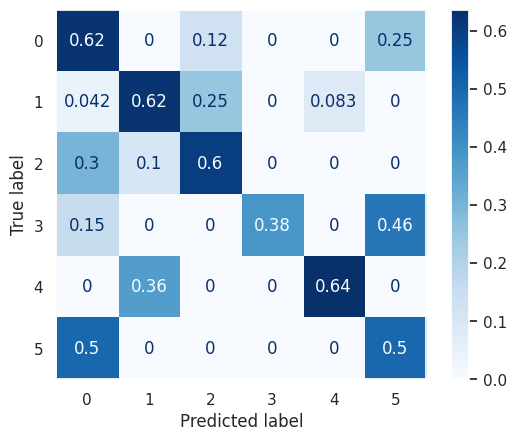

In [113]:
# Initialize and train the model
model =  RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on validation data
y_pred_valid = model.predict(X_valid)

# Evaluate the model performance on validation data
print('Validation Accuracy: {:.4f}'.format(accuracy_score(y_valid, y_pred_valid)))

# Confusion matrix
confusion_mat = confusion_matrix(y_valid, y_pred_valid, normalize='all')
print(f'Confusion matrix:\n', confusion_mat)

# Visualize the confusion matrix
ConfusionMatrixDisplay(confusion_mat).plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

# Print classification report for detailed metrics
print(classification_report(y_valid, y_pred_valid))

y_pred_test = model.predict(X_test)

# Model Evaluation on Test Set
print('\nAccuracy: {:.4f}'.format(accuracy_score(y_test, y_pred_test)))
print('Precision (Macro): {:.4f}'.format(precision_score(y_test, y_pred_test, average="macro")))
print('Recall (Macro): {:.4f}'.format(recall_score(y_test, y_pred_test, average="macro")))
print('F1 Score (Macro): {:.4f}'.format(f1_score(y_test, y_pred_test, average="macro")))

# Balanced accuracy is useful for multi-class evaluation
print('Balanced Accuracy: {:.4f}'.format(balanced_accuracy_score(y_test, y_pred_test)))

# Confusion Matrix and Classification Report
confusion_mat = sklearn.metrics.confusion_matrix(y_test, y_pred_test, normalize='true')
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat).plot(cmap=plt.cm.Blues)
plt.grid(False)
print(sklearn.metrics.classification_report(y_test, y_pred_test, digits=4))

## Artificial Neural Network Model

In [114]:
# Separate the features (X) and the target variable (y)
X = df_classification.drop(columns=['Target_hour','microstructure', 'seedLocation'])
y = df_classification['Target_hour']

# Split the data into training, validation, and test sets
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.10, shuffle=True, random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.12, shuffle=True, random_state=0)

X_train=scal_encod_pipeline.fit_transform(X_train)
X_valid=scal_encod_pipeline.fit_transform(X_valid)
X_test=scal_encod_pipeline.fit_transform(X_test)

# Define the `Dense` layer.
dense_layer_1 = Dense(units=50, activation=relu)
dense_layer_2 = Dense(units=50, activation=relu)
out_layer = Dense(units=6, activation=softmax)

# Define the "virtual" input
input = Input(shape=X_train.shape[1:])

# Define the "virtual" output
output = dense_layer_1(input)
output = dense_layer_2(output)
output = out_layer(output)

# Define the neural network model.
model = Model(inputs=[input], outputs=[output], name='Multi_class_Classification')

# Output the summary of the model.
model.summary()

# COmpile the model
sgd = SGD(learning_rate=0.01)
ce = SparseCategoricalCrossentropy()
acc = SparseCategoricalAccuracy()
model.compile(optimizer=sgd, loss=ce, metrics=[acc])

# Train the model.
history = model.fit(X_train, y_train, batch_size=20, epochs=35, validation_data=(X_valid, y_valid))


Model: "Multi_class_Classification"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 18)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 50)                  │             950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 6)                   │             306 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,806 (14.87 KB)

 Trainable params: 3,806 (14.87 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.8223 - sparse_categorical_accuracy: 0.1288 - val_loss: 1.8186 - val_sparse_categorical_accuracy: 0.1667
Epoch 2/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7709 - sparse_categorical_accuracy: 0.1834 - val_loss: 1.7859 - val_sparse_categorical_accuracy: 0.1759
Epoch 3/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7443 - sparse_categorical_accuracy: 0.2454 - val_loss: 1.7649 - val_sparse_categorical_accuracy: 0.1944
Epoch 4/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7296 - sparse_categorical_accuracy: 0.2525 - val_loss: 1.7510 - val_sparse_categorical_accuracy: 0.2130
Epoch 5/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7200 - sparse_categorical_accuracy: 0.2608 - val_loss: 1.7404 - val_sparse_categorical_accuracy: 0.2222
Epoch 6/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7193 - sparse_categorical_accuracy: 0.2262 - val_loss: 1.7336 - val_sparse_categorical_accuracy: 0.2222
Epoch 7/35
40/40

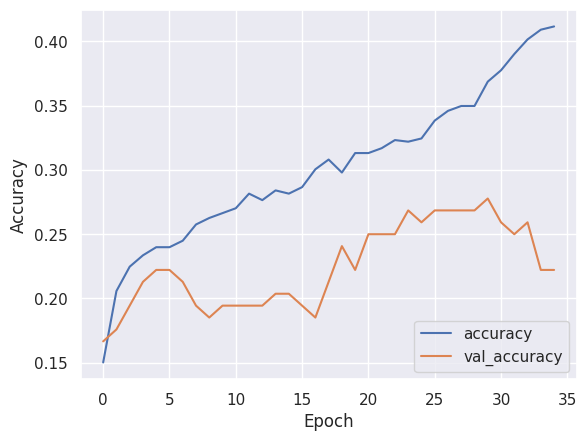

In [115]:
# Plot validation MSE, alwys nice to have plots to help us visualise things!
plt.plot(history.history['sparse_categorical_accuracy'], label='accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [116]:
y_test_logit = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [117]:
y_test_pred = np.argmax(y_test_logit, axis=1)
print(y_test_pred)

[5 1 0 2 2 1 2 2 2 1 5 0 5 1 2 2 2 2 1 1 4 2 0 1 1 2 5 0 5 0 0 1 0 4 0 1 0
 2 5 0 2 1 5 2 5 5 1 2 2 5 2 5 2 2 0 4 1 2 2 1 0 0 1 1 2 1 1 0 5 2 2 5 0 0
 2 1 0 0 4 2 0 2 0 4 0 2 2 0 1 1 1 5 2 2 2 1 2 2 1 2]


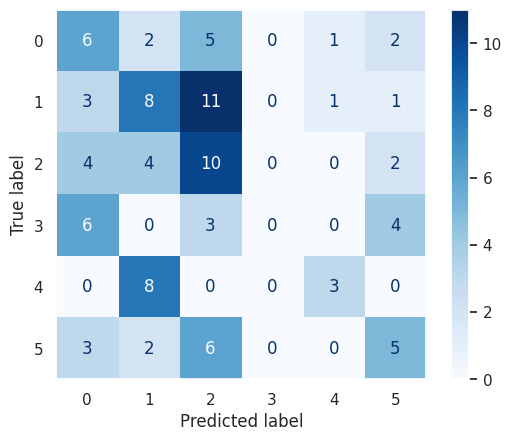

The accuracy on the test data with the selected hyperparameter: 0.32
The F1 score on the test data with the selected hyperparameter: 0.28684875066454013
Precision on test data: 0.3081529581529581
Recall on test data: 0.2989267676767677


In [118]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred))
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

acc_test = accuracy_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred, average='macro')
print('The accuracy on the test data with the selected hyperparameter:', acc_test)
print('The F1 score on the test data with the selected hyperparameter:', f1_test)
pre_test = precision_score(y_test, y_test_pred, average='macro')
print('Precision on test data:', pre_test)
reca_test = recall_score(y_test, y_test_pred, average='macro')
print('Recall on test data:', reca_test)

In [119]:
first_layer = Dense(units=128*4, activation=relu)
##############################
# Set proportion of nodes to deactivate with every training iteration (20% in this case)
second_layer = Dropout(0.2)
##############################
third_layer = Dense(units=128*4, activation=relu)
forth_layer = Dense(units=128*4, activation=relu)
fifth_layer = Dense(units=128*4, activation=relu)
out_layer = Dense(units=6, activation=softmax)

input = Input(shape=X_train.shape[1:])
output = first_layer(input)
output = second_layer(output)
output = third_layer(output)
output = forth_layer(output)
output = fifth_layer(output)
output = out_layer(output)

# Define the neural network model.
model = Model(inputs=[input], outputs=[output], name='Dropout')
model.summary()

Model: "Dropout"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 18)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 512)                 │           9,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 800,774 (3.05 MB)

 Trainable params: 800,774 (3.05 MB)

 Non-trainable params: 0 (0.00 B)

In [120]:
from tensorflow.keras.optimizers import Adam
# COmpile the model
adam = Adam(learning_rate=0.01)
ce = SparseCategoricalCrossentropy()
acc = SparseCategoricalAccuracy()
model.compile(optimizer=adam, loss=ce, metrics=[acc])

# Train the model.
history = model.fit(X_train, y_train, batch_size=20, epochs=35, validation_data=(X_valid, y_valid))

Epoch 1/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 1.9222 - sparse_categorical_accuracy: 0.2236 - val_loss: 1.5225 - val_sparse_categorical_accuracy: 0.3056
Epoch 2/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.4357 - sparse_categorical_accuracy: 0.3617 - val_loss: 1.3610 - val_sparse_categorical_accuracy: 0.3611
Epoch 3/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.3107 - sparse_categorical_accuracy: 0.3793 - val_loss: 1.2658 - val_sparse_categorical_accuracy: 0.4074
Epoch 4/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.1441 - sparse_categorical_accuracy: 0.4536 - val_loss: 1.2773 - val_sparse_categorical_accuracy: 0.3981
Epoch 5/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.0763 - sparse_categorical_accuracy: 0.4914 - val_loss: 1.1457 - val_sparse_categorical_accuracy: 0.4907
Epoch 6/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.0230 - sparse_categorical_accuracy: 0.5427 - val_loss: 1.2179 - val_sparse_categorical_accuracy: 0.5000
Epoch 7/35

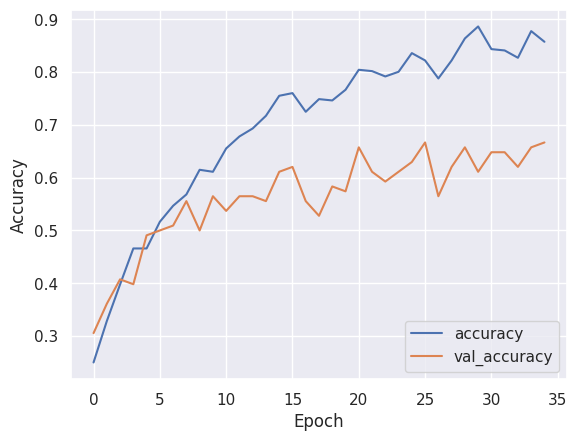

In [121]:
# Plot validation MSE, alwys nice to have plots to help us visualise things!
plt.plot(history.history['sparse_categorical_accuracy'], label='accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [122]:
y_test_logit = model.predict(X_test)
y_test_pred = np.argmax(y_test_logit, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


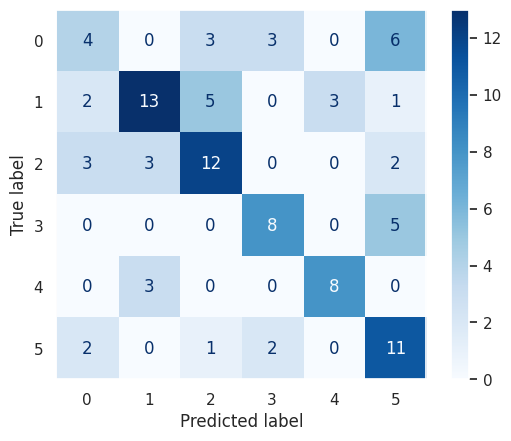

The accuracy on the test data with the selected hyperparameter: 0.56
The F1 score on the test data with the selected hyperparameter: 0.5609260035427553
Precision on test data: 0.5669888006730112
Recall on test data: 0.5703040015540015


In [123]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred))
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

acc_test = accuracy_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred, average='macro')
print('The accuracy on the test data with the selected hyperparameter:', acc_test)
print('The F1 score on the test data with the selected hyperparameter:', f1_test)
pre_test = precision_score(y_test, y_test_pred, average='macro')
print('Precision on test data:', pre_test)
reca_test = recall_score(y_test, y_test_pred, average='macro')
print('Recall on test data:', reca_test)